In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from matplotlib import rcParams 
!pip install pyaudio
import pyaudio

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANEE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ANEE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
!pip install scikit-plot
!pip install SpeechRecognition

In [4]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [5]:
df = pd.concat([df_train,df_val])#concatenating training and vaidation
df.reset_index(inplace=True,drop=True)

<AxesSubplot: xlabel='label', ylabel='count'>

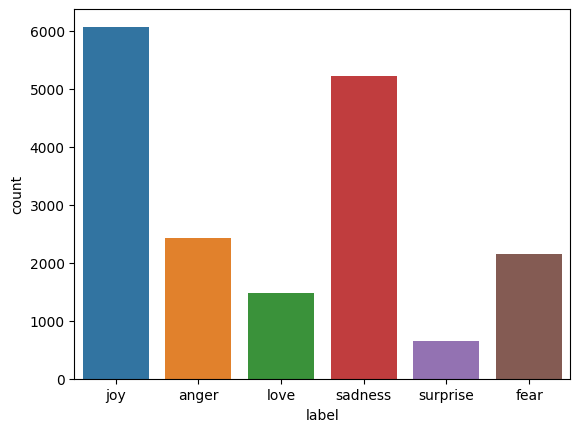

In [6]:
sns.countplot(x=df.label)

In [7]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace="happy",value=1,inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])

<AxesSubplot: xlabel='label', ylabel='count'>

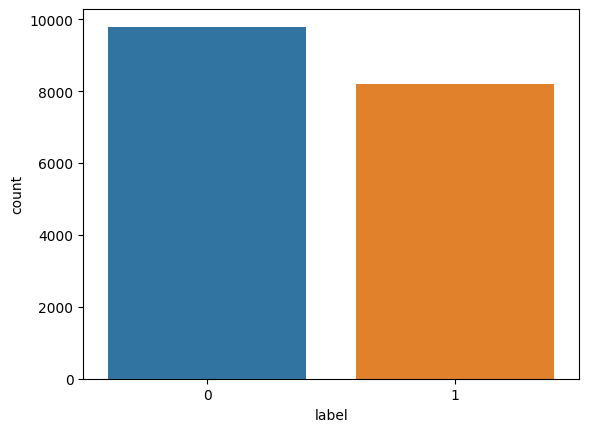

In [8]:
sns.countplot(x=df.label)

In [9]:
print(df.head)

<bound method NDFrame.head of                                                     text  label
0                          i like that product very much      1
1       im grabbing a minute to post i feel greedy wrong      0
2      i am ever feeling nostalgic about the fireplac...      1
3                                   i am feeling grouchy      0
4      ive been feeling a little burdened lately wasn...      0
...                                                  ...    ...
17994  im having ssa examination tomorrow in the morn...      0
17995  i constantly worry about their fight against n...      1
17996  i feel its important to share this info for th...      1
17997  i truly feel that if you are passionate enough...      1
17998  i feel like i just wanna buy any cute make up ...      1

[17999 rows x 2 columns]>


In [10]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df['text'])
#corpus

a


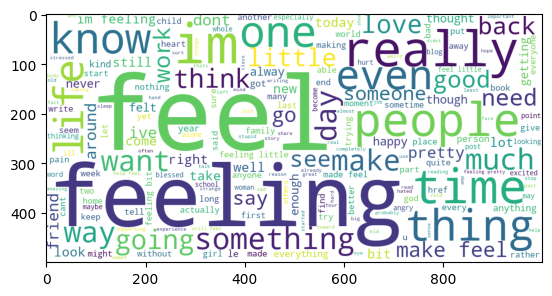

In [11]:
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
print('a')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [13]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [14]:
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [15]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = lr.predict(testdata)

Accuracy_score:  0.9720139930034982
Precision_score:  0.9747530186608123
Recall_score:  0.9641693811074918
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1080
           1       0.97      0.96      0.97       921

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



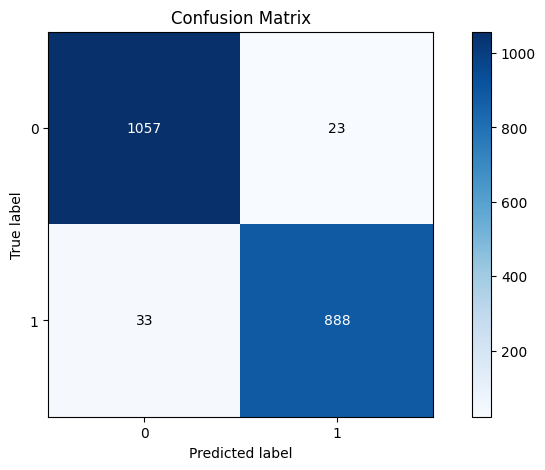

In [16]:
#ModelEvaluation
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

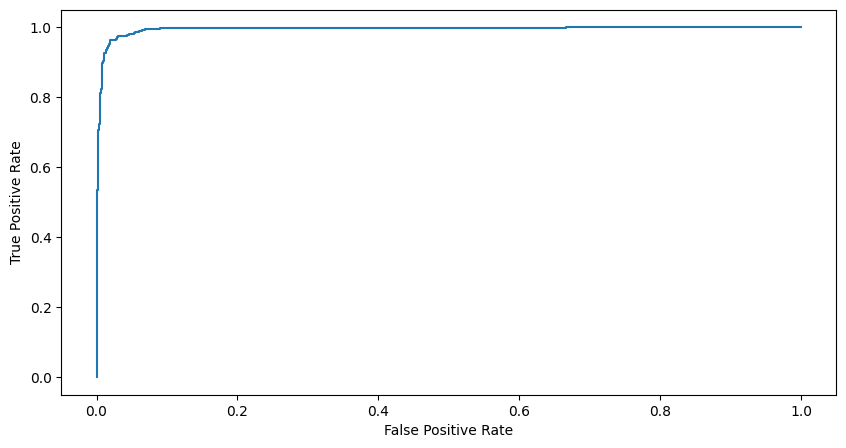

In [17]:
prob_a = lr.predict_proba(testdata)
fpr,tpr,thresholds=roc_curve(y_test,prob_a[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [18]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [19]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = lr.predict(transformed_input)
    expression_check(prediction)

In [20]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]

In [21]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


In [23]:
import speech_recognition as sr
r=sr.Recognizer()

with sr.Microphone() as source2:
    #adjust the energy threshold based on the surrounding noise
    r.adjust_for_ambient_noise(source2,duration=4)
    print("Calibrated, Now speak....#express your review")
    #listening to the source
    audio2 = r.listen(source2)
    Text=r.recognize_google(audio2)
    print(Text)


Calibrated, Now speak....#express your review
boss I like that product very much


In [24]:
lst=[]
lst.append(Text)
sentiment_predictor(lst)

Input statement has Positive Sentiment.
